In [171]:
import susie
import numpy as np
import pandas as pd
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris
import matplotlib.pyplot as plt

In [172]:
url = 'all_lit_times_TrES-3b_deleted.csv'
# Read the CSV file directly from the URL
data = pd.read_csv(url)
# tra_or_occs = np.array(data["tra_or_occ"])#change names to columns needed
epochs = np.array(data["Epoch"].astype('int'))
mid_times = np.array(data["Midtime"])
mid_time_errs = np.array(data["Midtime_err_minus_days"])

In [173]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, tra_or_occ=None, time_scale='tdb')
ephemeris_obj1 = Ephemeris(timing_obj1)

In [174]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')
for key, value in linear_model_data.items():
    print(f"{key}: {value}\n")

period: 1.3061865211742583

period_err: 3.528730752034514e-08

conjunction_time: 2454185.9110085173

conjunction_time_err: 9.511809606088412e-05

model_type: linear

model_data: [2454185.91100852 2454198.97287373 2454214.64711198 2454215.9532985
 2454239.46465589 2454256.44508066 2454337.42864497 2454354.40906975
 2454388.3699193  2454504.62051968 2454521.60094446 2454532.05043663
 2454533.35662315 2454534.66280967 2454535.96899619 2454537.27518271
 2454538.58136923 2454539.88755576 2454541.19374228 2454542.4999288
 2454551.64323445 2454552.94942097 2454569.92984574 2454589.52264356
 2454589.52264356 2454593.44120312 2454594.74738964 2454598.66594921
 2454611.72781442 2454615.64637398 2454615.64637398 2454619.56493355
 2454627.40205267 2454632.62679876 2454640.46391789 2454640.46391789
 2454641.77010441 2454648.30103701 2454649.60722353 2454650.91341006
 2454650.91341006 2454653.5257831  2454653.5257831  2454657.44434266
 2454662.66908875 2454670.50620787 2454674.42476744 2454683.56807

In [175]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')
for key, value in quadratic_model_data.items():
    print(f"{key}: {value}\n")

period: 1.3061871018559792

period_err: 1.4582162583363464e-07

conjunction_time: 2454185.9105918263

conjunction_time_err: 0.0001367567260021821

period_change_by_epoch: -3.041627845765541e-10

period_change_by_epoch_err: 7.347002017640931e-11

model_type: quadratic

model_data: [2454185.91059183 2454198.97246283 2454214.64670799 2454215.95289509
 2454239.46426275 2454256.44469488 2454337.4282936  2454354.40872543
 2454388.36958896 2454504.62023562 2454521.60066696 2454532.05016314
 2454533.35635016 2454534.66253718 2454535.9687242  2454537.27491122
 2454538.58109824 2454539.88728526 2454541.19347228 2454542.4996593
 2454551.64296842 2454552.94915544 2454569.92958663 2454589.52239178
 2454589.52239178 2454593.4409528  2454594.74713981 2454598.66570083
 2454611.72757087 2454615.64613188 2454615.64613188 2454619.56469288
 2454627.40181488 2454632.62656287 2454640.46368485 2454640.46368485
 2454641.76987185 2454648.30080683 2454649.60699382 2454650.91318081
 2454650.91318081 2454653.5255

In [176]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_model_data)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_model_data)

print(f"Linear Model BIC: {linear_bic_value}\nQuadratic Model BIC: {quadratic_bic_value}")

Linear Model BIC: 2593.1447857189305
Quadratic Model BIC: 2459.3892915988167


In [177]:
delta_bic_value = ephemeris_obj1.calc_delta_bic()

print(f"\u0394 BIC: {delta_bic_value}")

Δ BIC: 133.75549412011378


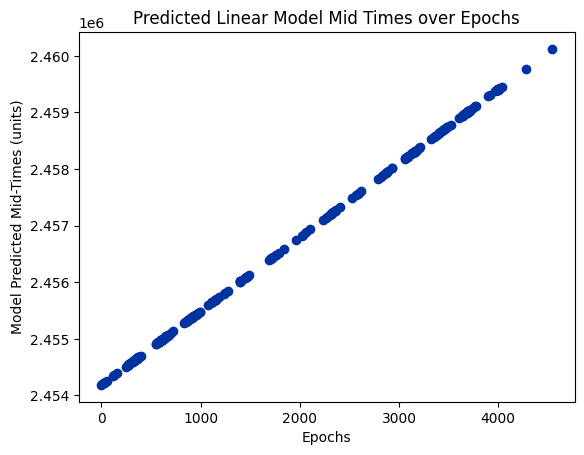

In [178]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(linear_model_data, save_plot=False)

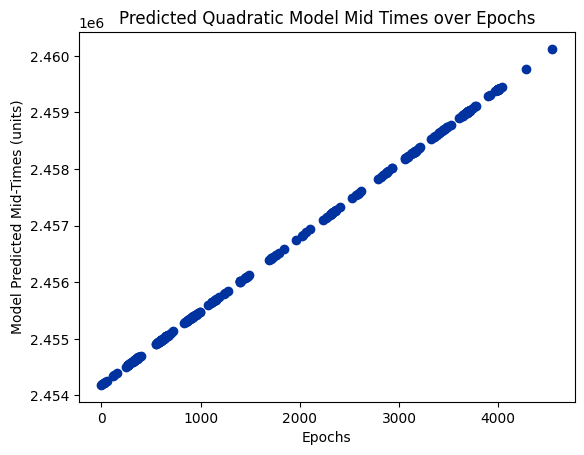

In [179]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(quadratic_model_data, save_plot=False)

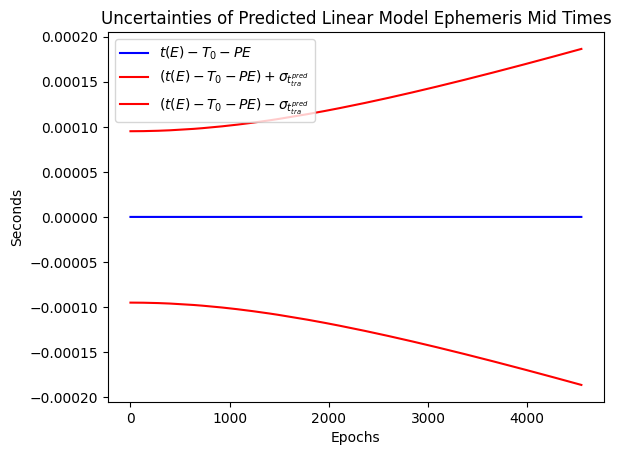

In [180]:
ephemeris_obj1.plot_timing_uncertainties(linear_model_data, save_plot=False)

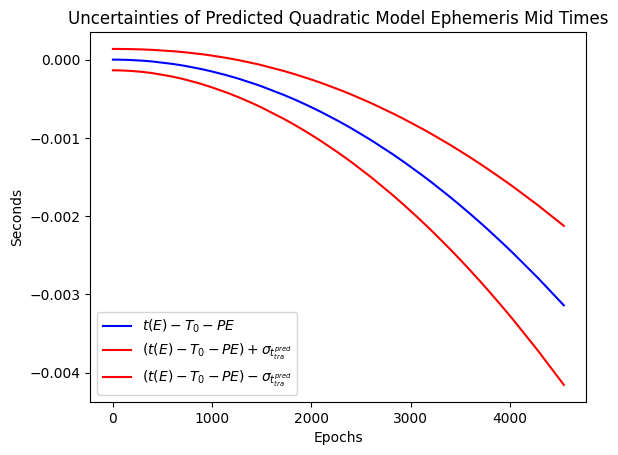

In [181]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_model_data, save_plot=False)


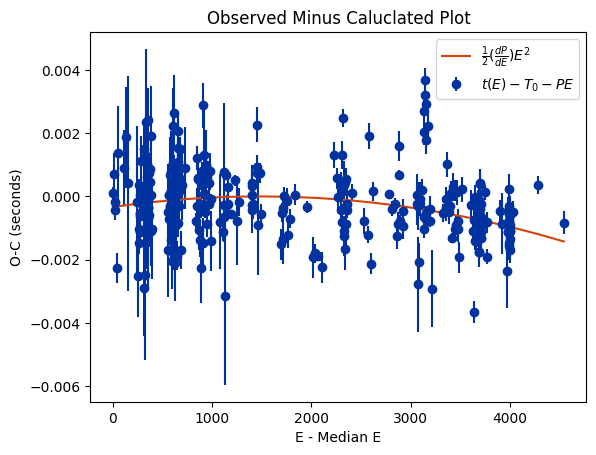

In [182]:
ephemeris_obj1.plot_oc_plot()


In [183]:
# Problem data point is in index 241
print(epochs[241])
print(mid_times[241])
print(mid_time_errs[241])

3353
2458565.5540507594
0.00042


In [184]:
DAYS_TO_SECONDS = 86400
# y = T0 - PE - 0.5 dP/dE E^2
lin_model = ephemeris_obj1.get_model_ephemeris('linear')
quad_model = ephemeris_obj1.get_model_ephemeris('quadratic')
# y = 0.5 dP/dE * (E - median E)^2
# TODO: Make this calculation a separate function
quad_model_curve = (0.5*quad_model['period_change_by_epoch'])*((ephemeris_obj1.timing_data.epochs - np.median(ephemeris_obj1.timing_data.epochs))**2) * DAYS_TO_SECONDS
# plot points w/ x=epoch, y=T(E)-T0-PE, yerr=sigmaT0
# y = self._subtract_plotting_parameters(self.timing_data.mid_times, lin_model['conjunction_time'], lin_model['period'], self.timing_data.epochs)
y = (ephemeris_obj1._subtract_plotting_parameters(ephemeris_obj1.timing_data.mid_times, lin_model['conjunction_time'], lin_model['period'], ephemeris_obj1.timing_data.epochs)) * DAYS_TO_SECONDS

In [185]:
i = 0
while i in range(len(y)):
    # if epochs[i] > 3000 and epochs[i] < 4000:
    if y[i] > 1000:
        print(i)
        print(epochs[i], y[i])
    i+=1

In [186]:
i = 0

while i in range(len(mid_times) - 1):
    diff = mid_times[i+1] - mid_times[i]
    if diff > 300:
        print(f"epoch: {epochs[i]}, mid_time: {mid_times[i]}")
    i += 1

epoch: 4035, mid_time: 2459456.373120725
epoch: 4280, mid_time: 2459776.3896707376


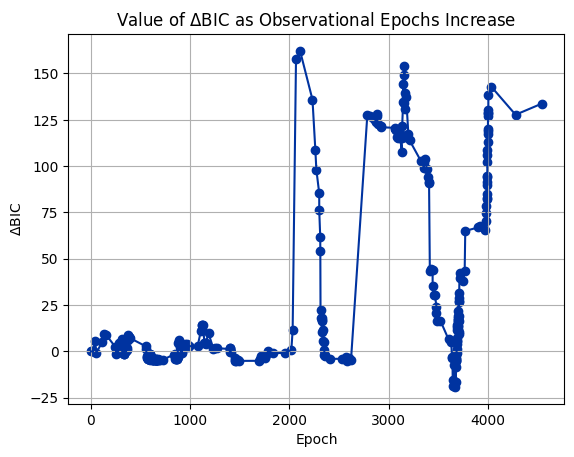

In [187]:
ephemeris_obj1.plot_running_delta_bic()
